In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


**Load Dataset**

In [2]:
df = pd.read_csv("udemy_output_All_Finance__Accounting.csv")
df.head()


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


**Data Processing**

In [ ]:
#Handle missing values
df.isnull().sum()
df.dropna(subset=['num_subscribers'], inplace=True)


In [ ]:
#Convert date columns
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])


In [7]:
#Currency conversion (if INR → USD)
df['discount_price__amount'] = df['discount_price__amount'] * (1/82)
df['price_detail__amount'] = df['price_detail__amount'] * (1/82)


In [8]:
#Add Discount Percentage
df['Discount_Percentage'] = ((df['price_detail__amount'] - df['discount_price__amount']) / df['price_detail__amount']) * 100
df['Discount_Percentage'].fillna(df['Discount_Percentage'].median(), inplace=True)


In [10]:
#Clean Course Titles
df['title'] = df['title'].str.lower().str.strip()
df['title'] = df['title'].str.replace(r'\s+', ' ', regex=True)
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)


In [11]:
#Categorize Courses
def categorize_title(title):
    title = title.lower()
    if 'sql' in title or 'mysql' in title or 'database' in title:
        return 'Database'
    elif 'tableau' in title or 'power bi' in title:
        return 'Data Visualization'
    elif 'excel' in title:
        return 'Spreadsheet'
    elif 'finance' in title or 'accounting' in title:
        return 'Finance'
    elif 'mba' in title or 'business' in title:
        return 'Business'
    elif 'pmp' in title or 'project management' in title:
        return 'Project Management'
    elif 'marketing' in title or 'sales' in title:
        return 'Sales/Marketing'
    else:
        return 'Other'

df['category'] = df['title'].apply(categorize_title)


**Exploratory data analysis**

In [13]:

#Top 10 courses by subscribers
top_subs = df.nlargest(10, 'num_subscribers')
px.bar(top_subs, x='num_subscribers', y='title', orientation='h', title='Top 10 Courses by Subscribers')


In [ ]:
#Top 10 courses by rating
top_rated = df.nlargest(10, 'rating')
px.bar(top_rated, x='rating', y='title', orientation='h', title='Top 10 Courses by Rating')


In [ ]:
#Top 5 by Discount %
top_discount = df.nlargest(5, 'Discount_Percentage')
px.bar(top_discount, x='Discount_Percentage', y='title', orientation='h', title='Top 5 Courses by Discount')


In [ ]:
#Growth Over Time
courses_growth = df.set_index('published_time').resample('Y')['id'].count()
px.line(courses_growth, title='Courses Growth Over Time')


In [18]:
#paid vs free courses
paid_free = df.groupby('is_paid').size().reset_index(name='Count')
px.pie(paid_free, names='is_paid', values='Count', title='Paid vs Free Courses')


*Predictive Modeling (ML Section)*

In [19]:
X = df[['avg_rating', 'num_reviews', 'num_published_lectures', 'discount_price__amount', 'price_detail__amount']]
y = df['num_subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 36971837.41373261
R-squared: 0.6908372861395295


*Visualize prediction accuracy*

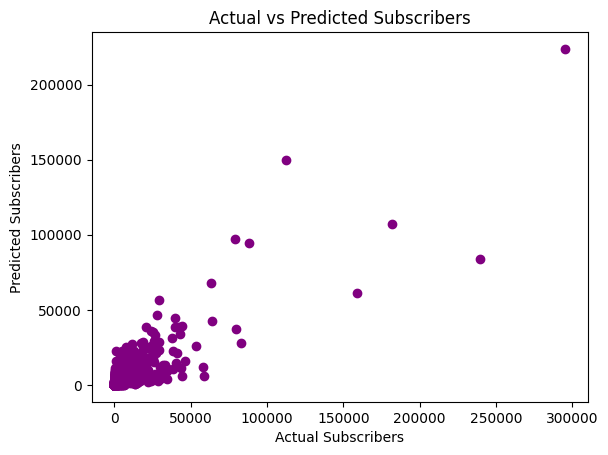

In [20]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Subscribers')
plt.ylabel('Predicted Subscribers')
plt.title('Actual vs Predicted Subscribers')
plt.show()


In [21]:
df.to_csv("Cleaned_Udemy_Data.csv", index=False)


*Predictive Modeling (Machine Learning Section)*

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
#Select Features & Target Variable
X = df[['avg_rating', 'num_reviews', 'num_published_lectures',
        'discount_price__amount', 'price_detail__amount']]
y = df['num_subscribers']


*Split Data into Train and Test Sets*

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


*Train the Model*

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


*Make Predictions*

In [28]:
y_pred = model.predict(X_test)


*Evaluate the Model*

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 36971837.41373261
R-squared Score: 0.6908372861395295


*Visualize Predicted vs Actual Subscribers*

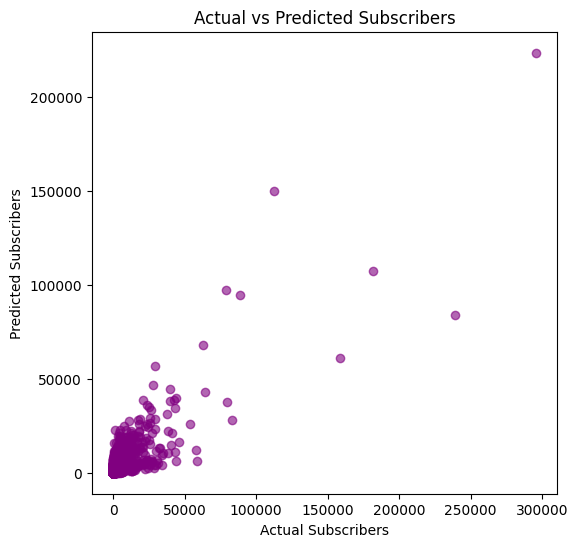

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel('Actual Subscribers')
plt.ylabel('Predicted Subscribers')
plt.title('Actual vs Predicted Subscribers')
plt.show()
